# Análisis de la posible sismicidad inducida presentada en La Loma, Cesar desde el espectro de frecuencias

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyproj
import plotly.graph_objects as go
#import obspy
#import spec 
#import scipy

## Antecedentes

-   https://www.elheraldo.co/economia/consejo-de-estado-ordena-suspender-produccion-de-gas-de-drummond-en-campo-la-loma-687184
-   https://co.boell.org/es/2022/09/12/pierden-con-el-carbon-y-sin-el-los-dilemas-de-la-transicion-energetica-en-cesar
-   https://elpilon.com.co/consejo-de-estado-revoco-medida-que-suspendia-trabajo-de-drummond-en-15-pozos-del-cesar/
-   https://guiadelgas.com/industria/consejo-de-estado-suspende-15-pozos-de-drummond-en-el-campo-la-loma/
-   https://www.semana.com/impacto/articulo/drummond-tendra-que-suspender-operaciones-en-15-pozos-de-gas-en-el-cesar/48075/
-   https://www.elheraldo.co/economia/consejo-de-estado-ordena-suspender-produccion-de-gas-de-drummond-en-campo-la-loma-687184

"Las actividades de estimulación hidráulica se adelantaron entre el 14 de marzo de 2018 y el tercer trimestre del mismo año, por medio de la perforación de 15 pozos. Esos pozos actualmente se encuentran en fase de producción."

## Filtros

Para este trabajo se utilizo una ventana de tiempo entre 1 de Junio de 1993 y 7 de Noviembre del 2022, para sismos con profundidades menores a 16 km, como lo dice la normatividad Colombiana, en un area cuadrada de () y ().

## Datos

-   Datos de pozos extraidos de https://srvags.sgc.gov.co/JSViewer/GEOVISOR_BIP/
-   Datos del area minera extraidos de ____
-   Datos de sismos extraidos de http://bdrsnc.sgc.gov.co/paginas1/catalogo/index.php
    -   http://bdrsnc.sgc.gov.co/paginas1/catalogo/Consulta_Experta/consulsismo3.php?pagina=1&longitudStart=-73.76&lat=&longitudEnd=-73.30&latitudStart=9.35&latitudEnd=9.90&magnitudStart=0&magnitudEnd=9&magnitudmwStart=0&magnitudmwEnd=9&depthStart=0&depthEnd=18&rmsStart=0&rmsEnd=10&inicial=01/06/1993&final=28/02/2018&contipo=cuadrante&longcentral=&radio=&registro1=70&departamento=&municipio=&gapinicio=0&gapfinal=360&eprofmin=0&elongmin=0&elatmin=0&eprofmax=999&elongmax=999&elatmax=999
    -   

## Manejo de Datos

### Pozos

In [119]:
well=pd.read_csv('BIP_pozos.csv')
well=well[np.isin(well['FIELD_ABRE'],['LA LOMA','LA LOMA (LA LOMA)'])]

In [120]:
region=(well['WELL_X_COO'].max()+10000,well['WELL_Y_COO'].max()+10000,well['WELL_X_COO'].min()-10000,well['WELL_Y_COO'].min()-10000)

In [121]:
region[0]

1085283.0

In [122]:
region[2]

1034438.5

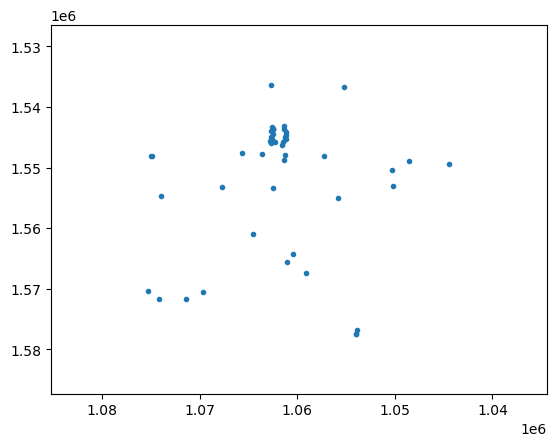

In [123]:
plt.plot(well['WELL_X_COO'],well['WELL_Y_COO'],'.')
plt.xlim(region[0],region[2])
plt.ylim(region[1],region[3])
plt.show()

Pasar de coordenadas geográficas a métricas

In [124]:
magnas_wgs = pyproj.Transformer.from_crs('epsg:3116', 'epsg:4326')

In [125]:
x,y=([region[0],region[0],region[2],region[2]],[region[1],region[3],region[1],region[3]])

In [126]:
lat, lon = magnas_wgs.transform(y, x)
lat, lon = np.array(lat),np.array(lon)

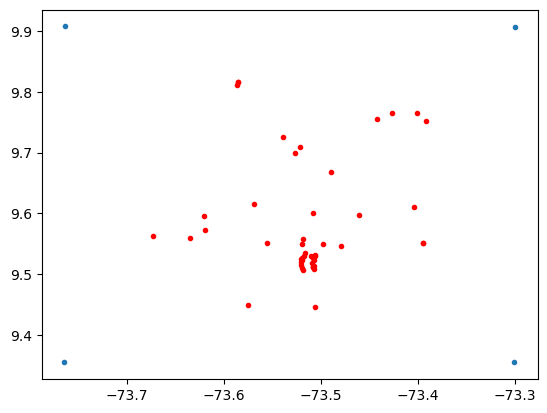

In [127]:
plt.plot(well['WELL_LONGI'],well['WELL_LATIT'],'r.')
plt.plot(lon,lat,'.')

In [128]:
reg=(lon.max(),lat.max(),lon.min(),lat.min())

In [129]:
filtros=[-73.76,9.35,-73.30,9.90]

In [130]:
well['DP']=well['WELL_TVD']*0.3048

### Sismos

In [131]:
da=pd.read_csv('SEISAN.csv',delimiter=';',decimal=',')
db=pd.read_csv('SEISCOMP.csv')

In [132]:
da['UTC']=da['FECHA']+[' ']*len(da['FECHA'])+da['HORA_UTC']
da=da[['UTC', 'LATITUD (grados)', 'LONGITUD (grados)','PROFUNDIDAD (Km)', 'MAGNITUD Ml','RMS (Seg)', 'GAP (grados)','ERROR LATITUD (Km)', 'ERROR LONGITUD (Km)', 'ERROR PROFUNDIDAD (Km)',]]
db=db[['Fecha-Hora  (UTC)', 'Lat(°)', 'Long(°)', 'Prof(Km)', 'Mag.', 'Rms(Seg)', 'Gap(°)', 'Error Lat(Km)','Error Long(Km)', 'Error Prof(Km)']]


In [133]:
renb={}
for key,val in zip(['Fecha-Hora  (UTC)', 'Lat(°)', 'Long(°)', 'Prof(Km)', 'Mag.', 'Rms(Seg)', 'Gap(°)', 'Error Lat(Km)','Error Long(Km)', 'Error Prof(Km)'],
                    ['UTC','LAT','LON','DP','MAG','RMS','GAP','ELAT','ELON','EDP']):
    renb[key]=val

In [134]:
db=db.rename(columns=renb)

In [135]:
rena={}
for key,val in zip(['UTC', 'LATITUD (grados)', 'LONGITUD (grados)','PROFUNDIDAD (Km)', 'MAGNITUD Ml', 'RMS (Seg)', 'GAP (grados)','ERROR LATITUD (Km)', 'ERROR LONGITUD (Km)', 'ERROR PROFUNDIDAD (Km)'],
                    ['UTC','LAT','LON','DP','MAG','RMS','GAP','ELAT','ELON','EDP']):
    rena[key]=val

In [136]:
da=da.rename(columns=rena)

In [137]:
eq=pd.concat([da,db])

C:\Users\jujim\AppData\Local\Temp\ipykernel_8552\2400040990.py:2: UserWarning:

You passed a edgecolor/edgecolors ('red') for an unfilled marker (11).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



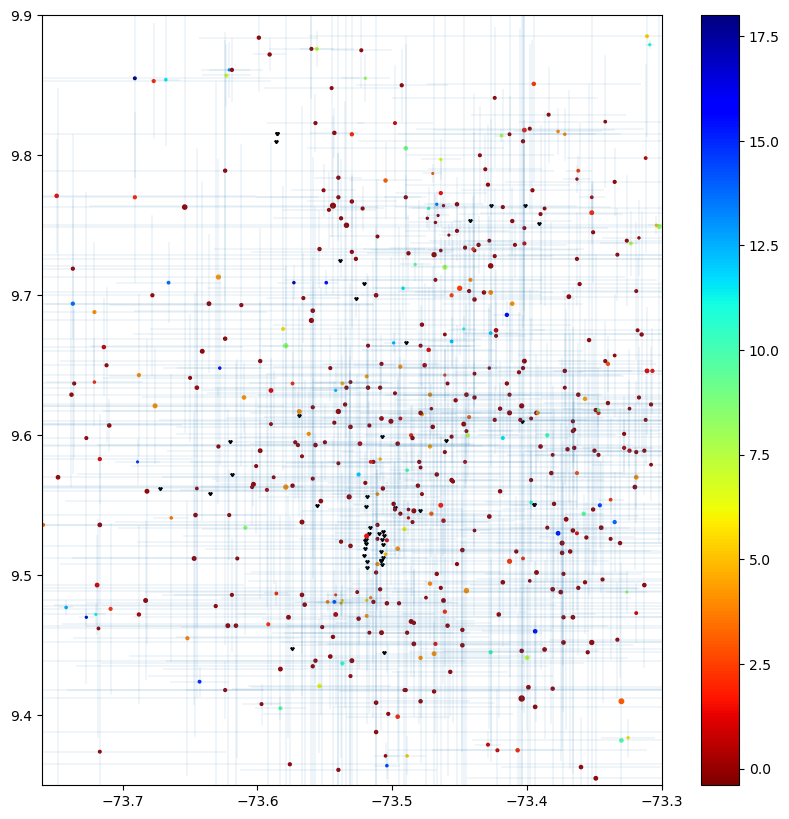

In [138]:
plt.figure(figsize=(10,10))
plt.scatter(well['WELL_LONGI'],well['WELL_LATIT'],c='black',marker=11,s=6,edgecolor='red')
plt.errorbar(eq['LON'],eq['LAT'],yerr=eq['ELAT']/111.1,xerr=eq['ELON']/111.1,elinewidth=0.1,fmt='none')
plt.scatter(eq['LON'],eq['LAT'],c=eq['DP'],cmap='jet_r',s=2**eq['MAG'])
plt.colorbar()
plt.xlim(filtros[0],filtros[2])
plt.ylim(filtros[1],filtros[3])
plt.show()

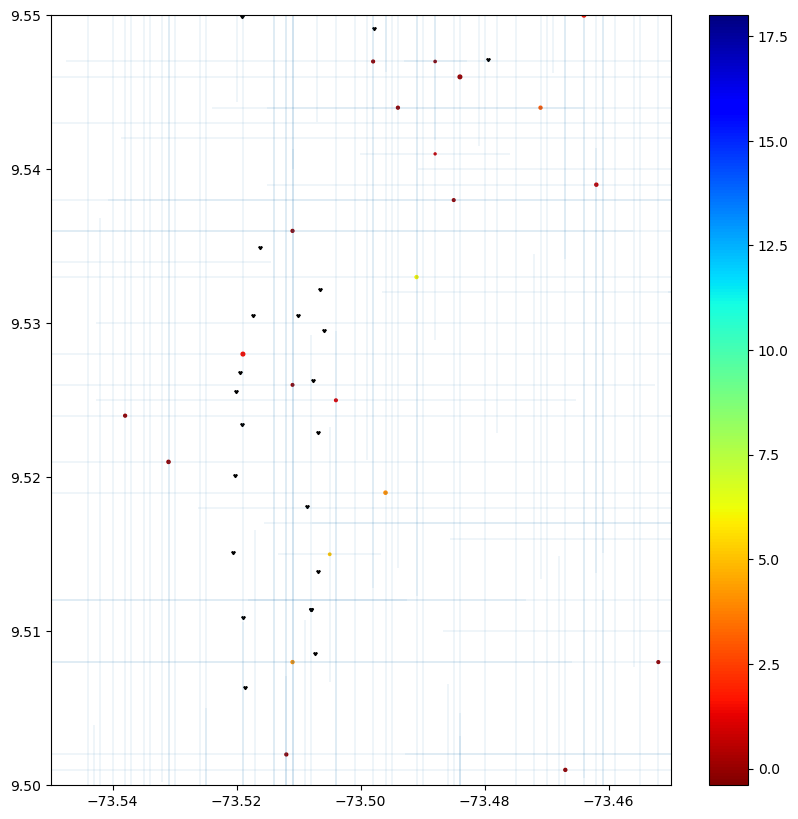

In [139]:
plt.figure(figsize=(10,10))
plt.errorbar(eq['LON'],eq['LAT'],yerr=eq['ELAT']/111.1,xerr=eq['ELON']/111.1,elinewidth=0.1,fmt='none')
plt.scatter(well['WELL_LONGI'],well['WELL_LATIT'],c='black',marker=11,s=6)
plt.scatter(eq['LON'],eq['LAT'],c=eq['DP'],cmap='jet_r',s=2**eq['MAG'])
plt.colorbar()
plt.xlim(-73.55,-73.45)
plt.ylim(9.5,9.55)
plt.show()

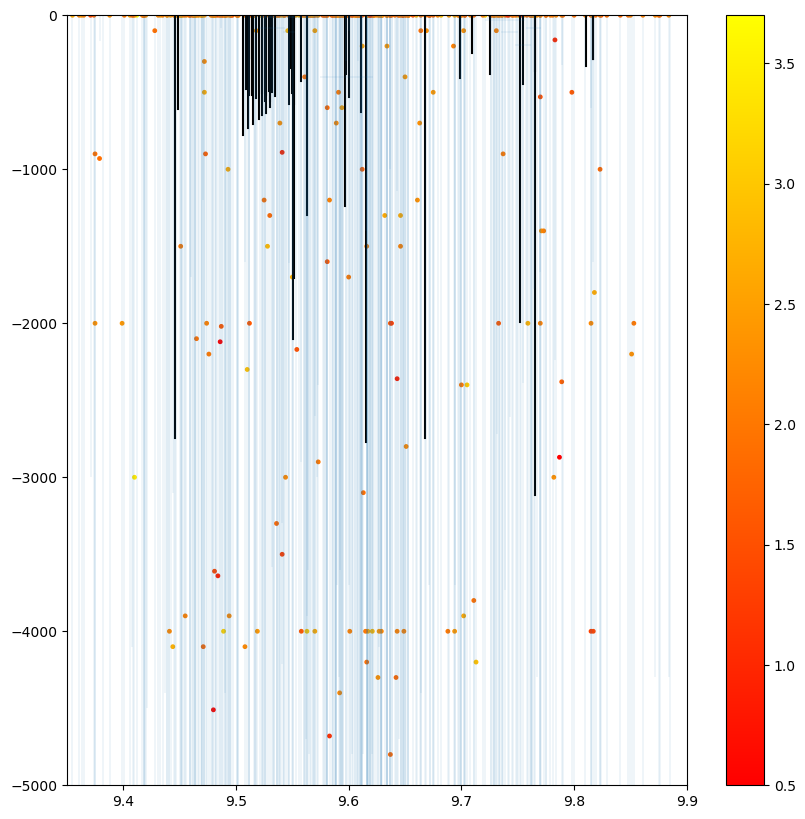

In [140]:
plt.figure(figsize=(10,10))
plt.plot([well['WELL_LATIT'],well['WELL_LATIT']],[[0]*len(well['DP']),well['DP']*-1],'k')
plt.errorbar(eq['LAT'],eq['DP']*1000,yerr=eq['EDP']*1000,xerr=eq['ELAT']/111.1,elinewidth=0.1,fmt='none')
plt.scatter(eq['LAT'],eq['DP']*-1000,c=eq['MAG'],s=6,cmap='autumn')
plt.colorbar()
plt.ylim(-5000,0)
plt.xlim(filtros[1],filtros[3])
# plt.xlim(9.5,9.55)
plt.show()

In [141]:
cumulative=np.cumsum([1]*len(eq['UTC']))

In [142]:
eq['UTC']=pd.to_datetime(eq['UTC'])
slope=pd.DataFrame()
slope['day']=(eq['UTC'].map(pd.Timestamp.timestamp)-8.49751113e+08)/(3600*24)
slope['cum']=cumulative

In [143]:
slopev=[]
for i in range(len(slope['day'].values)-1):
    slopev.append((slope['cum'].values[i+1]-slope['cum'].values[i])/(slope['day'].values[i+1]-slope['day'].values[i]))

In [144]:
fig = go.Figure(data=go.Scatter(x=eq['UTC'], y=cumulative))
fig.show()

In [145]:
well.columns

Index(['UWI', 'WELL_NAME', 'WELL_COUNT', 'DEPARTAMEN', 'WELL_COU_1',
       'WELL_TVD', 'WELL_KB_EL', 'ROTARY_ELE', 'WELL_DRILL', 'WELL_GROUN',
       'FIELD_ABRE', 'GEOLOGIC_P', 'CONTRATO', 'WELL_LONGI', 'WELL_LATIT',
       'WELL_X_COO', 'WELL_Y_COO', 'WELL_X_DEP', 'WELL_Y_DEP', 'DATUM',
       'WELL_SPUD_', 'COORD_QUAL', 'DOCUMENTO', 'COMMENT_', 'WELL_COMPL',
       'WELL_CLA_1', 'WELL_STA_1', 'WELLTYPE', 'FECHA_ACTU', 'ENTITLEMEN',
       'ACTUALIZAD', 'CREAT_DATE', 'OPERATOR_W', 'COMPANY_CO', 'CARGA_SGC',
       'CONT_EPIS', 'RELACIONAD', 'CLAS_FINAL', 'FORMACION_', 'FORMACION1',
       'ESTRUCTURA', 'WELL_ALIAS', 'VISIBLE', 'DP'],
      dtype='object')

In [146]:
fig = go.Figure(data=[go.Scatter3d(
    x=eq['LON'],
    y=eq['LAT'],
    z=eq['DP']*-1,
    mode='markers',
    marker=dict(
        size=2**eq['MAG'],
        color=eq['DP'],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])
pozos=go.Scatter3d(
    x=well['WELL_LONGI'],
    y=well['WELL_LATIT'],
    z=[0]*len(well['WELL_LATIT']),
    mode='markers',
    marker=dict(
        size=5,
        color='black',                # set color to an array/list of desired values
        # colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    ),
    error_z=dict(
        array=[0]*len(well['WELL_LONGI']), 
        arrayminus=well['DP']/1000,             
        color='black',   # choose a colorscale
        symmetric=False,
        width=0.01,
        visible=True
    )
)
fig.add_trace(pozos)
fig.show()

In [147]:
# fig = go.Figure(data=go.Scatter(x=eq['UTC'].values[0:-1], y=slopev))
# fig.show()

### Formas de Onda 

In [195]:
from obspy import read
# from obspy.signal import filter
import matplotlib.pyplot as plt
# import obspy
# from obspy.clients.fdsn import Client
# from obspy.signal.trigger import recursive_sta_lta, trigger_onset
from obspy.core.utcdatetime import UTCDateTime

In [196]:
st = read('data/2015-12-13-1849-21S.COL___184')
ztra=[]
for i in st:
    if i.stats.channel=='HHZ' or i.stats.channel=='EHZ':
        if  'LL7' in i.stats.station:#'VMM' in i.stats.station or
            ztra.append(i)
            pass

¿Cual es la mejor estacion para hacer el analisis espectral?¿La mas cercana por periodo de tiempo?¿Revisar boletines?

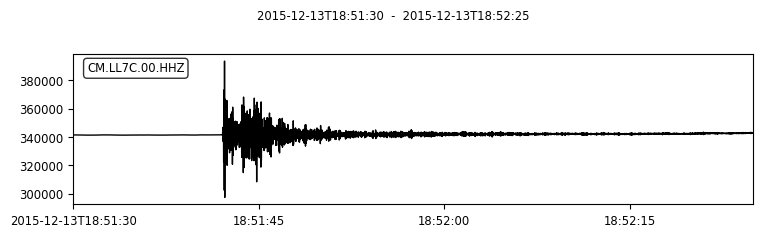

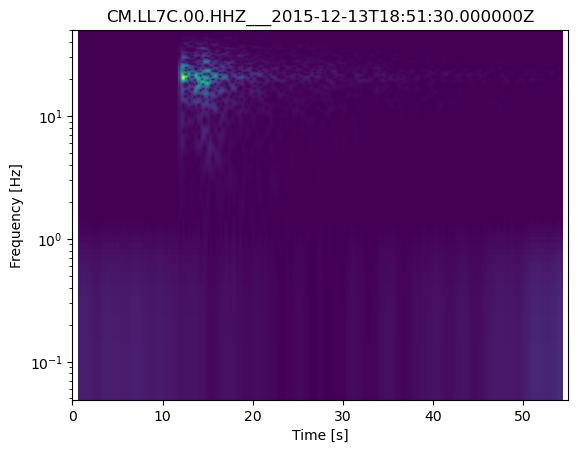

In [197]:
for i in ztra:
    #Aplicarle un filtro pasa alto!!!!!!
    #i.filter('lowpass', freq=1/100, corners=2, zerophase=True)
    #i.data = filter.lowpass(i.data,freq=100, corners=1, zerophase=True, df=i.stats.sampling_rate)
    # i.plot()
    # i.filter('bandpass',freqmin=1,freqmax=49.9)
    # i.filter('highpass',freq=1)
    dt = UTCDateTime("2015-12-13T18:51:40") #auto cut
    i.trim(dt-10, dt + 45)  
    i.plot()
    i.spectrogram(log=True, title=i.stats.network+'.'+i.stats.station+'.'+i.stats.location+'.'+i.stats.channel +'___'+ str(i.stats.starttime))
    #Espectro de Fourier
    